In [3]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

#visualization series
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') #for white color background
%matplotlib inline

from pandas_datareader.data import DataReader
from datetime import datetime

from __future__ import division
#float number (no need for python3)

In [28]:
#grab text stocks
tech_list = ['EBAY','BABA','AMZN']

In [29]:
#start time to grab data
end = datetime.now()

#year-1 allows you exactly 1 year before today 

start = datetime(end.year-1,end.month,end.day)

In [30]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [31]:
EBAY.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,66.643651,64.949048,65.744921,65.787857,7.311637e+06,65.431616
std,7.124292,7.054947,7.104583,7.072879,3.508203e+06,7.194844
min,50.549999,49.930000,50.480000,50.240002,2.817900e+06,49.686829
25%,61.139998,59.342499,60.400002,60.662501,5.304700e+06,60.184692
50%,66.334999,65.209999,65.594997,65.730003,6.391300e+06,65.589672
75%,73.577499,71.799999,72.735003,72.709999,8.434450e+06,72.475578
max,81.190002,79.900002,80.970001,80.589996,3.108200e+07,80.384384


In [32]:
BABA.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,202.761369,197.599461,200.481127,200.020516,2.114159e+07,200.020516
std,41.484308,41.197443,41.443095,41.267351,1.292721e+07,41.267351
min,118.190002,108.699997,113.639999,111.959999,7.650300e+06,111.959999
25%,168.535000,164.332504,167.050007,166.464996,1.351070e+07,166.464996
50%,213.605003,209.815002,212.129997,211.225006,1.732855e+07,211.225006
75%,234.157501,227.002499,230.349998,230.605007,2.381968e+07,230.605007
max,274.290009,270.399994,271.000000,270.829987,8.869920e+07,270.829987


In [55]:
AMZN.describe()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000,243.000000,233.000000,203.000000
mean,3377.314718,3309.425517,3343.847109,3342.455355,3.419327e+06,3342.455355,3343.012879,3344.744567,3341.534184
std,161.745937,158.385160,160.113580,160.130729,1.165658e+06,160.130729,148.413750,135.449969,102.899840
min,3009.000000,2881.000000,3005.000000,2951.949951,1.680300e+06,2951.949951,3043.209009,3061.776013,3169.008193
25%,3270.882507,3209.772522,3241.997498,3233.637512,2.575450e+06,3233.637512,3239.672998,3257.725500,3244.285500
50%,3367.280029,3302.079956,3340.859985,3333.844971,3.179700e+06,3333.844971,3338.379028,3334.920508,3363.758213
75%,3483.845032,3415.632507,3452.164978,3448.374939,3.991800e+06,3448.374939,3445.682031,3439.769495,3430.394604
max,3773.080078,3696.790039,3744.000000,3731.409912,9.957100e+06,3731.409912,3665.508008,3630.426990,3476.973188


<AxesSubplot:xlabel='Date'>

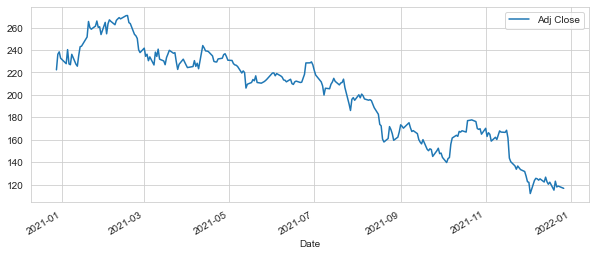

In [33]:
BABA['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

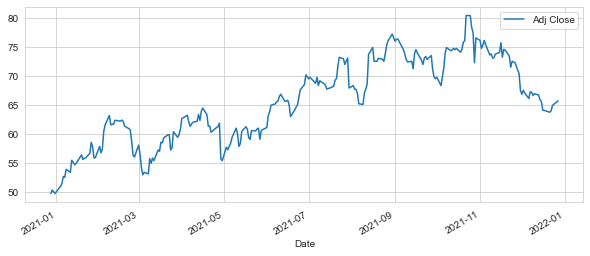

In [34]:
EBAY['Adj Close'].plot(legend=True,figsize=(10,4))

(<AxesSubplot:xlabel='Date'>,)

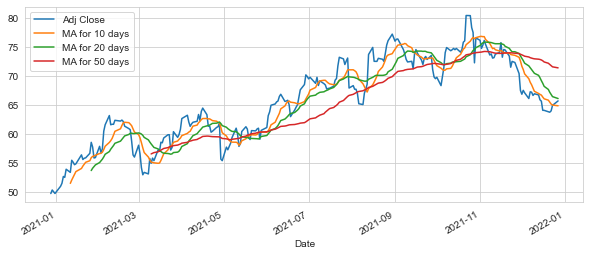

In [35]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))

    EBAY[column_name] = EBAY['Adj Close'].rolling(ma).mean()


#lets do 3 columns
#create a list for column names and plot them
EBAY[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False,figsize=(10,4)),

(<AxesSubplot:xlabel='Date'>,)

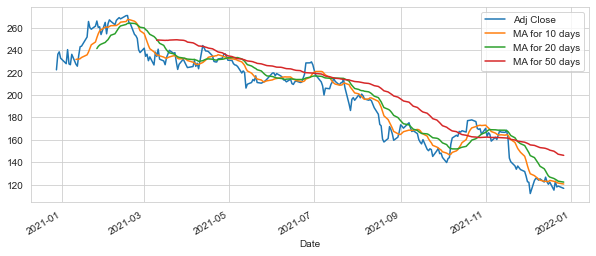

In [36]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))

    BABA[column_name] = BABA['Adj Close'].rolling(ma).mean()


#lets do 3 columns
#create a list for column names and plot them
BABA[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False,figsize=(10,4)),

(<AxesSubplot:xlabel='Date'>,)

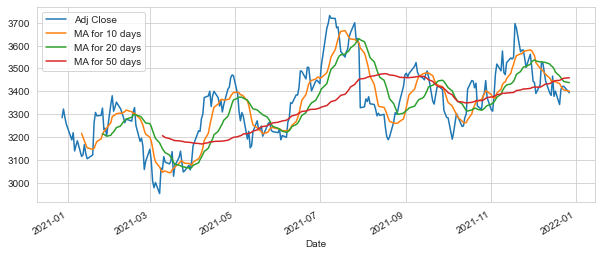

In [50]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))

    AMZN[column_name] = AMZN['Adj Close'].rolling(ma).mean()


#lets do 3 columns
#create a list for column names and plot them
AMZN[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False,figsize=(10,4)),

In [37]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [38]:
tech_rets = closing_df.pct_change()

/Users/tsvetomiradichevska/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


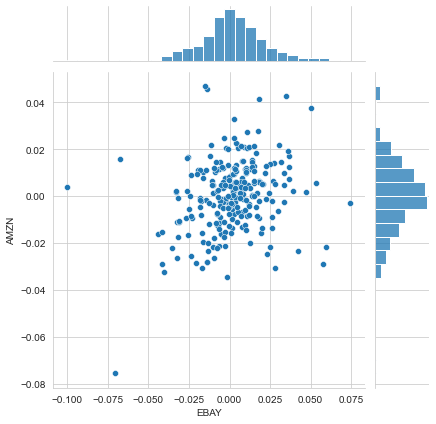

In [44]:
#compare 2 different stocks 
sns.jointplot('EBAY','AMZN',tech_rets,kind='scatter')

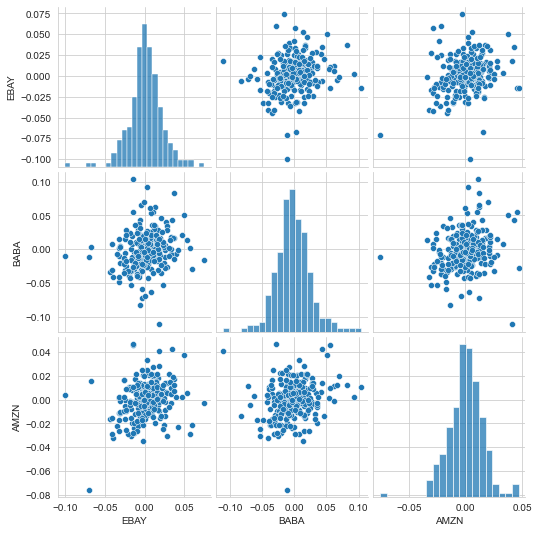

In [42]:
sns.pairplot(tech_rets.dropna())

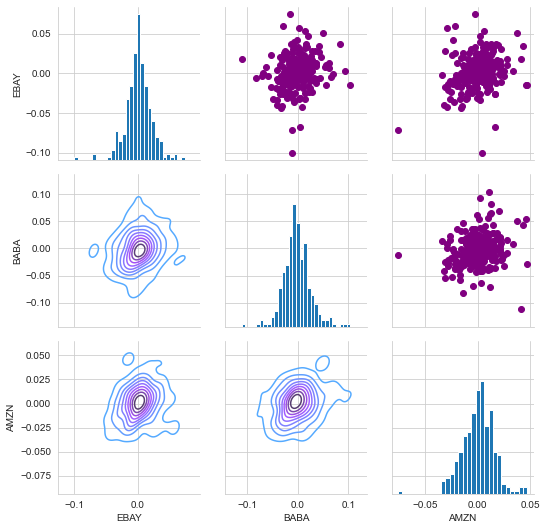

In [45]:
#more control with different figure

return_fig = sns.PairGrid(tech_rets.dropna())

#pass method map_upper - uper triangle 
return_fig.map_upper(plt.scatter,color='purple')

return_fig.map_lower(sns.kdeplot,cmap='cool_d')

return_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

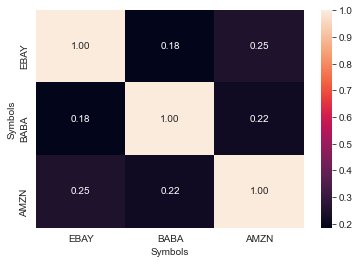

In [46]:
#coloration returns
tech_rets_corr= tech_rets.dropna().corr()

sns.heatmap(tech_rets_corr.dropna(),annot=True,fmt='.2f')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

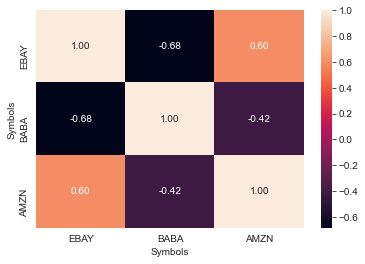

In [47]:
#for the closing price
tech_closing_corr= closing_df.dropna().corr()

sns.heatmap(tech_closing_corr.dropna(),annot=True,fmt='.2f')

In [60]:
#risk
rets = tech_rets.dropna()

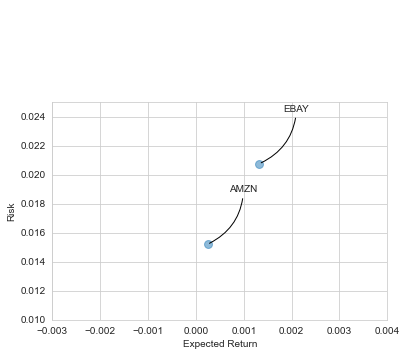

In [61]:
area = np.pi*20
#define the area of the scatter plot to see them better

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#
plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

#the labels
plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html

#for every column in that rets colum, using plt.annotate add the following arguments
#arguments are label, xym textcoords,arrowprops - they are all in the matplotlib doc
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', color='black', connectionstyle = 'arc3, rad= -.3'))


<AxesSubplot:xlabel='Date'>

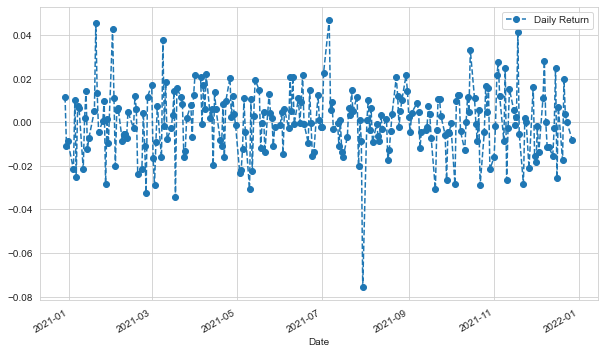

In [56]:
#daily returns
#look at the daily changes of the stock
#get the daily returns 
#looking at the percentage change of the 2 values
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()

AMZN['Daily Return'].plot(figsize=(10,6),legend=True,linestyle='--',marker='o')

<AxesSubplot:xlabel='Date'>

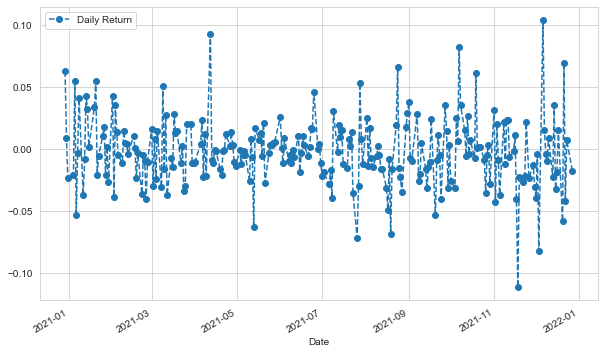

In [57]:
#daily returns
#look at the daily changes of the stock
#get the daily returns 
#looking at the percentage change of the 2 values
BABA['Daily Return'] = BABA['Adj Close'].pct_change()

BABA['Daily Return'].plot(figsize=(10,6),legend=True,linestyle='--',marker='o')

<AxesSubplot:xlabel='Date'>

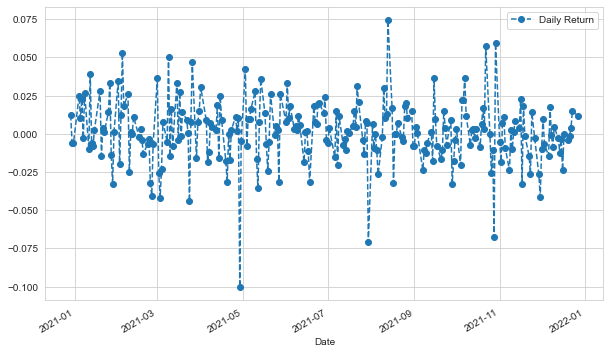

In [58]:
#daily returns
#look at the daily changes of the stock
#get the daily returns 
#looking at the percentage change of the 2 values
EBAY['Daily Return'] = EBAY['Adj Close'].pct_change()

EBAY['Daily Return'].plot(figsize=(10,6),legend=True,linestyle='--',marker='o')

In [62]:
rets.head()

Symbols,EBAY,BABA,AMZN
Date,,,
2020-12-29,0.012341,0.062511,0.011584
2020-12-30,-0.006095,0.009016,-0.010882
2020-12-31,-0.005935,-0.023743,-0.008801
2021-01-04,0.024876,-0.020968,-0.021585
2021-01-05,0.010291,0.055080,0.010004


In [64]:
rets['EBAY'].quantile(0.05)
#this means that the 0.05 quantile of the returns is -0.025 
#this means with 95% confidence your worst daily lost wouldnt exceed -0.025 - 2,5% wouldnt exceed 

-0.031855990992826155

In [65]:
#value at rist using the Monte Carlo method 
#start with simulations 
#time
days = 365

dt=1/days

#drift - mu equals to the average of GOOG rets
mu = rets.mean()['EBAY'] 

#sigma equal to standart deviation
sigma = rets.std()['EBAY']

#starting price and number of days and the daily returns
def stock_monte_carlo(start_price,days,mu,sigma):

    price = np.zeros(days)
    price[0] = start_price

    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range (1,days):

        #caclulate the shock
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))

        drift[x] = mu * dt

        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price 



In [66]:
EBAY.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2020-12-28,50.549999,49.930000,50.500000,50.240002,6187400.0,49.686829,NaN,NaN,NaN,NaN
2020-12-29,51.110001,50.299999,50.650002,50.860001,4796700.0,50.299999,NaN,NaN,NaN,0.012341
2020-12-30,51.509998,50.470001,51.020000,50.549999,8618900.0,49.993416,NaN,NaN,NaN,-0.006095
2020-12-31,50.810001,50.000000,50.610001,50.250000,3597200.0,49.696712,NaN,NaN,NaN,-0.005935
2021-01-04,51.900002,50.450001,50.480000,51.500000,7843500.0,50.932953,NaN,NaN,NaN,0.024876


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

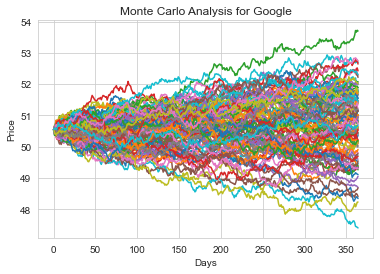

In [67]:
start_price = 50.54

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

#we let it run for 100 times
#add labels
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for EBAY')

In [68]:
runs = 10000

simulation = np.zeros(runs)
#10k arrays

#it will take the last price with days-1
for run in range(runs):
    simulation[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distrubtion for EBAY stock after 365 days')

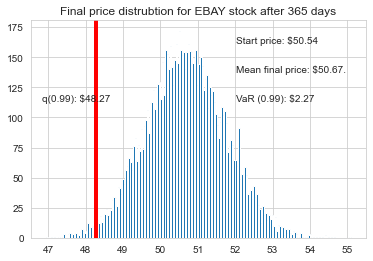

In [70]:
#to find the quantile and fit it into our output
q = np.percentile(simulation,1)

#plot histogram
plt.hist(simulation,bins=200)

#fill info
#starting price
plt.figtext(0.6,0.8, s="Start price: $%.2f" %start_price)

#mean ending price
plt.figtext(0.6,0.7, "Mean final price: $%.2f." %simulation.mean())

#variance of the price (within 99% confidence )
plt.figtext(0.6,0.6, "VaR (0.99): $%.2f" % (start_price -q))

#display 1% quantile
plt.figtext(0.15,0.6, "q(0.99): $%.2f" %q)

#display a line at the 1% quantile resutl 
plt.axvline(x=q, linewidth=4, color='r')

plt.title("Final price distrubtion for EBAY stock after %s days" % days)

BABA

In [73]:
days = 365

dt=1/days

#drift - mu equals to the average of GOOG rets
mu = rets.mean()['BABA'] 

#sigma equal to standart deviation
sigma = rets.std()['BABA']

#starting price and number of days and the daily returns
def stock_monte_carlo(start_price,days,mu,sigma):

    price = np.zeros(days)
    price[0] = start_price

    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range (1,days):

        #caclulate the shock
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))

        drift[x] = mu * dt

        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price 


In [74]:
BABA.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2020-12-28,224.990005,215.320007,216.880005,222.360001,73512100,222.360001,NaN,NaN,NaN,NaN
2020-12-29,239.190002,229.600006,231.759995,236.259995,69715900,236.259995,NaN,NaN,NaN,0.062511
2020-12-30,243.389999,234.645004,243.348007,238.389999,44812300,238.389999,NaN,NaN,NaN,0.009016
2020-12-31,238.919998,231.026993,237.460007,232.729996,23451800,232.729996,NaN,NaN,NaN,-0.023743
2021-01-04,230.380005,225.039993,226.500000,227.850006,24897900,227.850006,NaN,NaN,NaN,-0.020968


Text(0.5, 1.0, 'Monte Carlo Analysis for BABA')

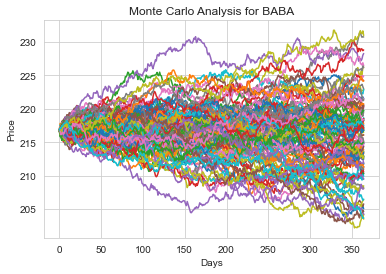

In [79]:
start_price = 216.80

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

#we let it run for 100 times
#add labels
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for BABA')

In [76]:
runs = 10000

simulation = np.zeros(runs)
#10k arrays

#it will take the last price with days-1
for run in range(runs):
    simulation[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distrubtion for BABA stock after 365 days')

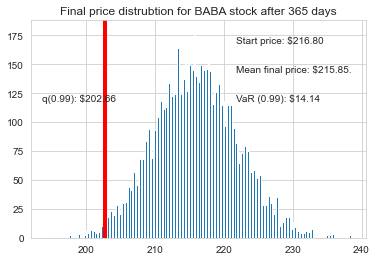

In [78]:
#to find the quantile and fit it into our output
q = np.percentile(simulation,1)

#plot histogram
plt.hist(simulation,bins=200)

#fill info
#starting price
plt.figtext(0.6,0.8, s="Start price: $%.2f" %start_price)

#mean ending price
plt.figtext(0.6,0.7, "Mean final price: $%.2f." %simulation.mean())

#variance of the price (within 99% confidence )
plt.figtext(0.6,0.6, "VaR (0.99): $%.2f" % (start_price -q))

#display 1% quantile
plt.figtext(0.15,0.6, "q(0.99): $%.2f" %q)

#display a line at the 1% quantile resutl 
plt.axvline(x=q, linewidth=4, color='r')

plt.title("Final price distrubtion for BABA stock after %s days" % days)

AMAZON

In [80]:
days = 365

dt=1/days

#drift - mu equals to the average of GOOG rets
mu = rets.mean()['AMZN'] 

#sigma equal to standart deviation
sigma = rets.std()['AMZN']

#starting price and number of days and the daily returns
def stock_monte_carlo(start_price,days,mu,sigma):

    price = np.zeros(days)
    price[0] = start_price

    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range (1,days):

        #caclulate the shock
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))

        drift[x] = mu * dt

        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price 


In [81]:
AMZN.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2020-12-28,3304.000000,3172.689941,3194.000000,3283.959961,5686800,3283.959961,NaN,NaN,NaN,NaN
2020-12-29,3350.649902,3281.219971,3309.939941,3322.000000,4872900,3322.000000,NaN,NaN,NaN,0.011584
2020-12-30,3342.100098,3282.469971,3341.000000,3285.850098,3209300,3285.850098,NaN,NaN,NaN,-0.010882
2020-12-31,3282.919922,3241.199951,3275.000000,3256.929932,2957200,3256.929932,NaN,NaN,NaN,-0.008801
2021-01-04,3272.000000,3144.020020,3270.000000,3186.629883,4411400,3186.629883,NaN,NaN,NaN,-0.021585


Text(0.5, 1.0, 'Monte Carlo Analysis for AMZN')

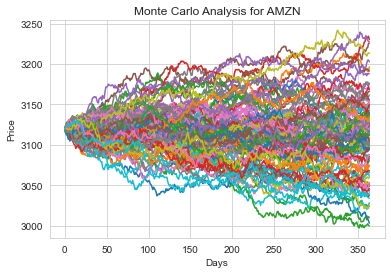

In [84]:
start_price = 3120.010

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

#we let it run for 100 times
#add labels
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for AMZN')

In [83]:
runs = 10000

simulation = np.zeros(runs)
#10k arrays

#it will take the last price with days-1
for run in range(runs):
    simulation[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distrubtion for AMZN stock after 365 days')

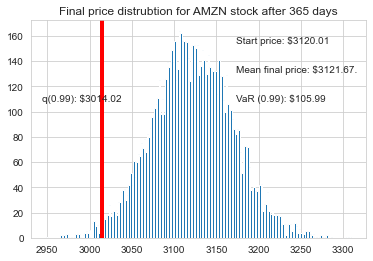

In [85]:
#to find the quantile and fit it into our output
q = np.percentile(simulation,1)

#plot histogram
plt.hist(simulation,bins=200)

#fill info
#starting price
plt.figtext(0.6,0.8, s="Start price: $%.2f" %start_price)

#mean ending price
plt.figtext(0.6,0.7, "Mean final price: $%.2f." %simulation.mean())

#variance of the price (within 99% confidence )
plt.figtext(0.6,0.6, "VaR (0.99): $%.2f" % (start_price -q))

#display 1% quantile
plt.figtext(0.15,0.6, "q(0.99): $%.2f" %q)

#display a line at the 1% quantile resutl 
plt.axvline(x=q, linewidth=4, color='r')

plt.title("Final price distrubtion for AMZN stock after %s days" % days)